In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from pathlib import Path
import numpy as np

---
# Download Data

In [0]:
folder = 'coffee'
file = 'urls_coffee.csv'

In [0]:
folder = 'pizza'
file = 'urls_pizza.csv'

In [0]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [15]:
path.ls()

[PosixPath('data/urls_coffee.csv'),
 PosixPath('data/pizza'),
 PosixPath('data/urls_pizza.csv'),
 PosixPath('data/coffee')]

In [0]:
classes = ['pizza', 'coffee']

In [17]:
download_images(path/file, dest, max_pics=200)

---
Varifies images and deletes the unhealthy ones (like currupted, webp, without extension, etc)

In [7]:
for c in classes:
    print(c)
    verify_images(path/c)

pizza


coffee


---
# View Data

In [0]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [20]:
data.classes

['coffee', 'pizza']

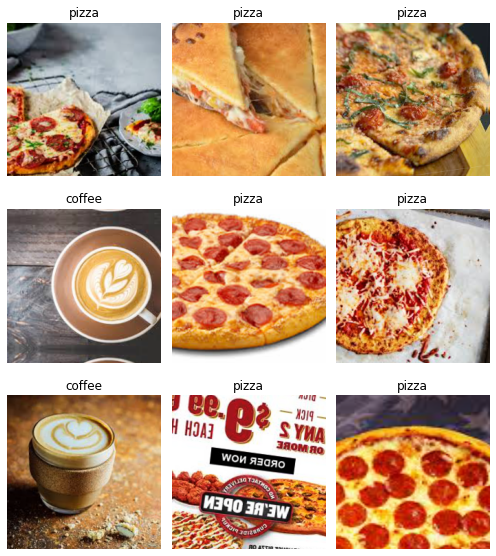

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [36]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coffee', 'pizza'], 2, 320, 80)

---
# Train Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
del learn

In [38]:
learn.fit_one_cycle(6, max_lr=0.03)

epoch,train_loss,valid_loss,error_rate,time
0,0.418677,0.006272,0.000000,01:52
1,0.214508,1.190595,0.125000,01:52
2,0.184148,0.679755,0.100000,01:50
3,0.204167,1.403965,0.187500,01:49
4,0.218306,1.669363,0.225000,01:49
5,0.223905,0.788094,0.087500,01:49


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

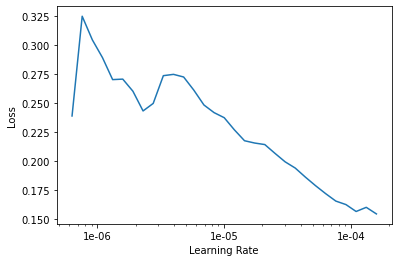

In [48]:
learn.recorder.plot()

In [0]:
learn.load('stage-1')

In [53]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.228760,0.021627,0.012500,02:39
1,0.143222,0.039226,0.025000,02:38


In [55]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.008419,0.046812,0.012500,02:38
1,0.017482,0.045646,0.012500,02:37


In [0]:
learn.save('stage-2')

---
# Interpretation

In [0]:
learn.load('stage-2')

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

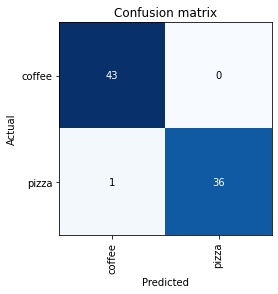

In [59]:
interp.plot_confusion_matrix()

---
# Cleanup

In [0]:
from fastai.widgets import *

In [0]:
cleaned_data = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(cleaned_data, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2')

In [66]:
ds, idx = DatasetFormatter.from_toplosses(learn_cln)

In [70]:
ds, idx = DatasetFormatter.from_similars(learn_cln)

Getting activations...


Computing similarities...


In [71]:
ImageCleaner(ds, idx, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
learn_cln.export()

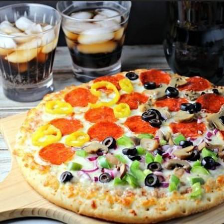

In [115]:
img = open_image(path/'pi.jpg')
img = img.resize(224)
img

In [0]:
load = load_learner(path)

In [116]:
pred_class, pred_idx, outputs = learn.predict(img)
data.classes[int(pred_idx)]

'pizza'